In [23]:
# Import necessary libraries
import pandas as pd

# Load the Excel file into a DataFrame
file_path = "challenge1.xlsx"
df = pd.read_excel(file_path)

# Filter out rows with years before 2017
df = df[df['year'] >= 2017]

# Display the first few rows of the DataFrame to inspect the data
print(df.head())

# Perform basic analysis (e.g., checking column names and data types)
print(df.info())

       month  year                                          image_url  \
35   January  2017  https://birdcount.in/wp-content/uploads/2017/0...   
36  February  2017  https://birdcount.in/wp-content/uploads/2017/0...   
37     March  2017  https://birdcount.in/wp-content/uploads/2017/0...   
38     April  2017  https://birdcount.in/wp-content/uploads/2017/0...   
39       May  2017  https://birdcount.in/wp-content/uploads/2017/0...   

                                article_url  list_based  location_based  \
35    https://birdcount.in/jan17-challenge/         1.0             0.0   
36    https://birdcount.in/feb17-challenge/         1.0             0.0   
37    https://birdcount.in/mar17-challenge/         1.0             0.0   
38  https://birdcount.in/april17-challenge/         1.0             1.0   
39    https://birdcount.in/may17-challenge/         1.0             1.0   

    species_based  habitat_based  media_based  time_based  ...  \
35            0.0            0.0          1.

In [24]:
import pandas as pd
import ast
from collections import Counter

# Ensure the column exists before processing
if "names_of_birders" in df.columns:
    # Function to safely parse the string and extract names
    def extract_names(name_list_str):
        try:
            # Convert string to list
            names = ast.literal_eval(name_list_str)
            return names
        except Exception:
            return []

    # Apply the function to extract names
    df["extracted_names"] = df["names_of_birders"].apply(extract_names)

    # Flatten the list of names and count their frequency
    all_names = [name for sublist in df["extracted_names"] for name in sublist]
    name_counts = Counter(all_names)

    # Create a new DataFrame with names and their frequency
    people_freq = pd.DataFrame(name_counts.items(), columns=["name", "frequency"])

    # Sort the DataFrame by frequency in descending order
    people_freq = people_freq.sort_values(by="frequency", ascending=False)

    # Display the new DataFrame
    print(people_freq)
else:
    print("Column 'names_of_birders' does not exist in the DataFrame.")

                        name  frequency
63          Lakshmikant Neve         94
118   Sreekumar Chirukandoth         80
51             Jayadev Menon         69
266       Vidhya Swaminathan         65
530            Shilpa Gadgil         63
...                      ...        ...
1174         Shreyas Punacha          1
1173       Shantanu Majumdar          1
1172     Samarth Shadakshari          1
1171         Sadashiv Pujari          1
2490             Trivedi Gvn          1

[2491 rows x 2 columns]


In [25]:
import pandas as pd
import ast
from collections import Counter

# Ensure the column exists before processing
if "names_of_birders" in df.columns:
    if "month" in df.columns and "year" in df.columns:
        if all(col in df.columns for col in ["list_based", "location_based", "species_based", "habitat_based", "media_based", "time_based"]):
            # Function to safely parse the string and extract names
            def extract_names(name_list_str):
                try:
                    # Convert string to list
                    names = ast.literal_eval(name_list_str)
                    return names
                except Exception:
                    return []

            # Apply the function to extract names
            df["extracted_names"] = df["names_of_birders"].apply(extract_names)

            # Create a list of dictionaries with name, month, year, and other columns
            people_date_data = []
            for index, row in df.iterrows():
                name_counts_in_row = Counter(row["extracted_names"])
                for name, frequency in name_counts_in_row.items():
                    people_date_data.append({
                        "name": name,
                        "month": row["month"],
                        "year": row["year"],
                        "tuple_frequency": frequency,
                        "list_based": row["list_based"],
                        "location_based": row["location_based"],
                        "species_based": row["species_based"],
                        "habitat_based": row["habitat_based"],
                        "media_based": row["media_based"],
                        "time_based": row["time_based"]
                    })

            # Create the new DataFrame
            people_date = pd.DataFrame(people_date_data)

            # Display the new DataFrame
            print(people_date)
        else:
            print("Required columns ('list_based', 'location_based', 'species_based', 'habitat_based', 'media_based', 'time_based') do not exist in the DataFrame.")
    else:
        print("Required columns ('month' and 'year') do not exist in the DataFrame.")
else:
    print("Required columns ('names_of_birders') do not exist in the DataFrame.")

                    name    month  year  tuple_frequency  list_based  \
0      Abhishek Ravindra  January  2017                1         1.0   
1          Aisha Sultana  January  2017                1         1.0   
2           Ajay Gadikar  January  2017                1         1.0   
3              Alan Knue  January  2017                1         1.0   
4                AM Amsa  January  2017                1         1.0   
...                  ...      ...   ...              ...         ...   
8766       Vaibhav Patil    April  2025                1         1.0   
8767      Vijaya Lakshmi    April  2025                1         1.0   
8768  Vikrant Prabhulkar    April  2025                1         1.0   
8769   Vivek Kumar Patel    April  2025                1         1.0   
8770    Vivek Sudhakaran    April  2025                1         1.0   

      location_based  species_based  habitat_based  media_based  time_based  
0                0.0            0.0            0.0       

In [26]:
import pandas as pd

# Ensure the DataFrame exists
if "people_date" in locals() or "people_date" in globals():
    # Create a mapping of month names to numeric values
    month_mapping = {
        "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
        "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
    }

    # Convert month names to numeric values
    people_date["month"] = people_date["month"].map(month_mapping)

    # Group by month and year, and calculate frequency
    common_date_freq = people_date.groupby(["month", "year"]).size().reset_index(name="frequency")

    # Create a datetime column for easier plotting
    common_date_freq["date"] = pd.to_datetime(common_date_freq[["year", "month"]].assign(day=1))

    # Keep only the relevant columns
    common_date_freq = common_date_freq[["date", "frequency"]]

    common_date_freq = common_date_freq.sort_values(by="date")

    # Display the resulting table
    print(common_date_freq)
else:
    print("DataFrame 'people_date' does not exist.")

         date  frequency
0  2017-01-01        139
9  2017-02-01        119
18 2017-03-01         86
35 2017-05-01         56
43 2017-06-01         34
..        ...        ...
94 2024-12-01        227
8  2025-01-01        305
17 2025-02-01        430
26 2025-03-01        256
34 2025-04-01         82

[95 rows x 2 columns]


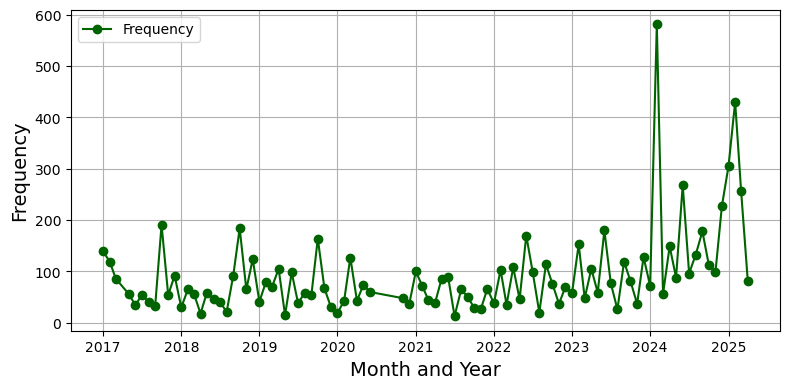

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the DataFrame exists
if "common_date_freq" in locals() or "common_date_freq" in globals():
    # Filter the data for dates from 2017 to the present
    filtered_data = common_date_freq[common_date_freq["date"].dt.year >= 2017]

    # Plot the line graph
    plt.figure(figsize=(8, 4))
    plt.plot(filtered_data["date"], filtered_data["frequency"], marker="o", color="darkgreen", label="Frequency")

    # Customize the plot
    # plt.title("Participation Frequency Over Time (2017 to Present)", fontsize=14)
    plt.xlabel("Month and Year", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()

    # Show the plot
    plt.show()
else:
    print("DataFrame 'common_date_freq' does not exist.")

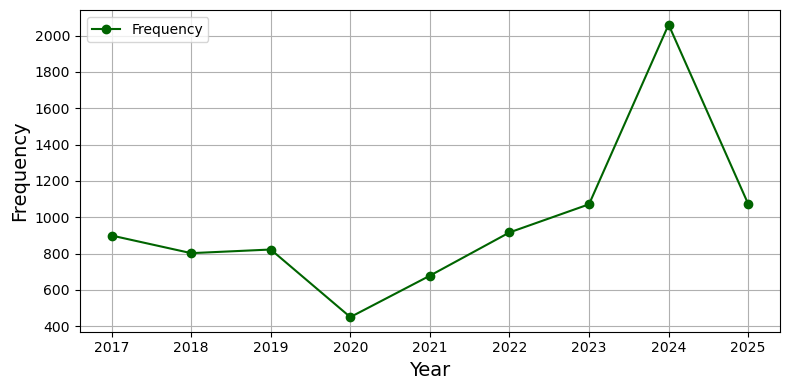

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the DataFrame exists
if "common_date_freq" in locals() or "common_date_freq" in globals():
    # Filter the data for years from 2027 to the present
    current_year = pd.Timestamp.now().year
    filtered_data = common_date_freq[common_date_freq["date"].dt.year >= 2017]

    # Extract the year from the date column
    filtered_data["year"] = filtered_data["date"].dt.year

    # Group by year and sum the frequency
    yearly_data = filtered_data.groupby("year")["frequency"].sum().reset_index()

    # Plot the line graph
    plt.figure(figsize=(8, 4))
    plt.plot(yearly_data["year"], yearly_data["frequency"], marker="o", color="darkgreen", label="Frequency")

    # Customize the plot
    # plt.title("Participation Frequency by Year (2027 to Present)", fontsize=28)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()

    # Show the plot
    plt.show()
else:
    print("DataFrame 'common_date_freq' does not exist.")

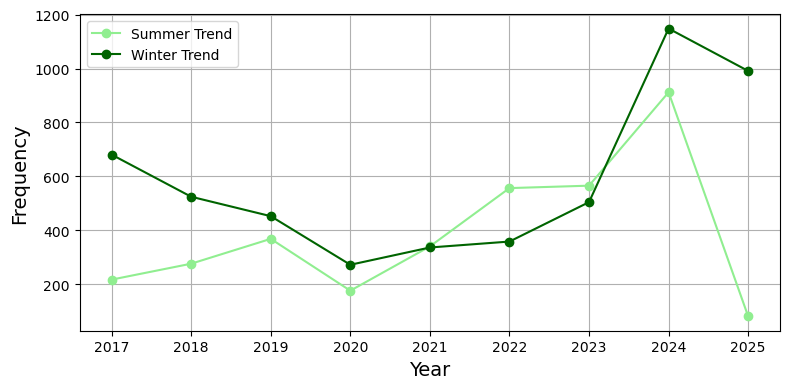

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the DataFrame exists
if "common_date_freq" in locals() or "common_date_freq" in globals():
    # Define summer and winter months
    summer_months = [4, 5, 6, 7, 8, 9]
    winter_months = [10, 11, 12, 1, 2, 3]

    # Filter the data for years from 2017 to the present
    filtered_data = common_date_freq[common_date_freq["date"].dt.year >= 2017]

    # Extract the year and month from the date column
    filtered_data["year"] = filtered_data["date"].dt.year
    filtered_data["month"] = filtered_data["date"].dt.month

    # Separate data into summer and winter
    summer_data = filtered_data[filtered_data["month"].isin(summer_months)]
    winter_data = filtered_data[filtered_data["month"].isin(winter_months)]

    # Group by year and sum the frequency for summer and winter
    summer_yearly_data = summer_data.groupby("year")["frequency"].sum().reset_index()
    winter_yearly_data = winter_data.groupby("year")["frequency"].sum().reset_index()

    # Plot the double line graph
    plt.figure(figsize=(8, 4))
    plt.plot(
        summer_yearly_data["year"],
        summer_yearly_data["frequency"],
        marker="o",
        color="lightgreen",
        label="Summer Trend"
    )
    plt.plot(
        winter_yearly_data["year"],
        winter_yearly_data["frequency"],
        marker="o",
        color="darkgreen",
        label="Winter Trend"
    )

    # Customize the plot
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    # plt.title("Participation Frequency by Year (Summer vs Winter)", fontsize=16)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("DataFrame 'common_date_freq' does not exist.")

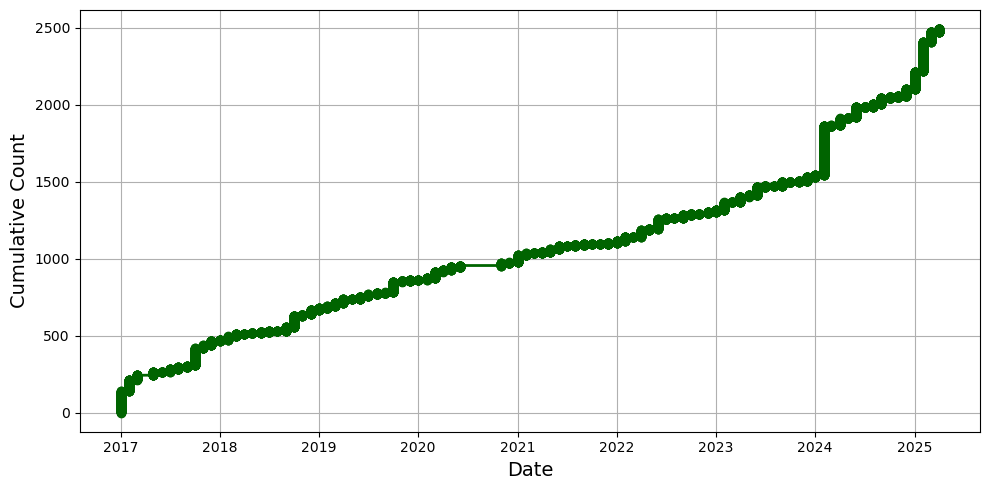

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    "name": people_date['name'],
    "month": people_date['month'],
    "year": people_date['year'],
    "tuple_frequency": people_date['tuple_frequency']
}
df = pd.DataFrame(data)

df = df[df["year"] >= 2017]

# Sort the DataFrame by year and month
df = df.sort_values(by=["year", "month"])

# Create a column to track cumulative unique names
df["is_new"] = ~df["name"].duplicated()
df["cumulative_new"] = df["is_new"].cumsum()

# Create a datetime column for plotting
df["date"] = pd.to_datetime(df[["year", "month"]].assign(day=1))

# Plot the cumulative graph
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["cumulative_new"], marker="o", color="darkgreen", label="Cumulative New People", linewidth=2)

# Customize the plot
# plt.title("Cumulative New People Joining Over Time", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cumulative Count", fontsize=14)
plt.grid(True)
plt.tight_layout()
# plt.legend()

# Show the plot
plt.show()

Total number of unique participants in summer: 1129
Total number of unique participants in winter: 2041


C:\Users\HP\AppData\Local\Temp\ipykernel_16776\4210104881.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Greens")


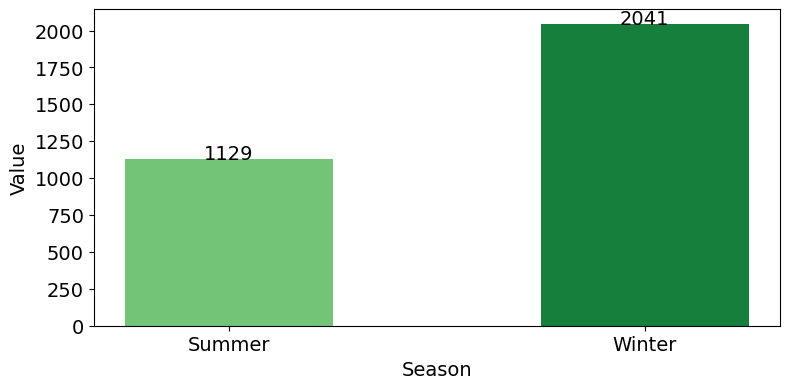

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Ensure the DataFrame exists
if "people_date" in locals() or "people_date" in globals():
    # Define summer and winter months
    summer_months = [4, 5, 6, 7, 8, 9]
    winter_months = [10, 11, 12, 1, 2, 3]

    # Filter data for 2017 and later
    filtered_data = people_date[people_date["year"] >= 2017]

    # Filter data for summer and winter
    summer_data = filtered_data[filtered_data["month"].isin(summer_months)]
    winter_data = filtered_data[filtered_data["month"].isin(winter_months)]

    # Calculate the total number of unique participants for summer and winter
    total_unique_summer = summer_data["name"].nunique()
    total_unique_winter = winter_data["name"].nunique()

    # Display the results
    print(f"Total number of unique participants in summer: {total_unique_summer}")
    print(f"Total number of unique participants in winter: {total_unique_winter}")
else:
    print("DataFrame 'people_date' does not exist.")



# Data for the bar graph
seasons = ["Summer", "Winter"]
values = [total_unique_summer, total_unique_winter]  # Replace with your actual values

# X-axis positions for the bars
x = np.arange(len(seasons))

# Bar width
bar_width = 0.5

# Use the "Greens" colormap
cmap = cm.get_cmap("Greens")
colors = cmap(np.linspace(0.5, 0.8, len(values)))

# Plot the bar graph
plt.figure(figsize=(8, 4))
plt.bar(x, values, width=bar_width, color=colors, label="Participants")

# Add labels and title
plt.xlabel("Season", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(x, seasons, fontsize=14)
plt.yticks(fontsize=14)

# Add value labels on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.5, f"{value:.0f}", ha="center", fontsize=14)

# Show the plot
plt.tight_layout()

Average number of unique participants in summer: 210.11111111111111
Average number of unique participants in winter: 378.77777777777777


C:\Users\HP\AppData\Local\Temp\ipykernel_16776\1752169882.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Greens")


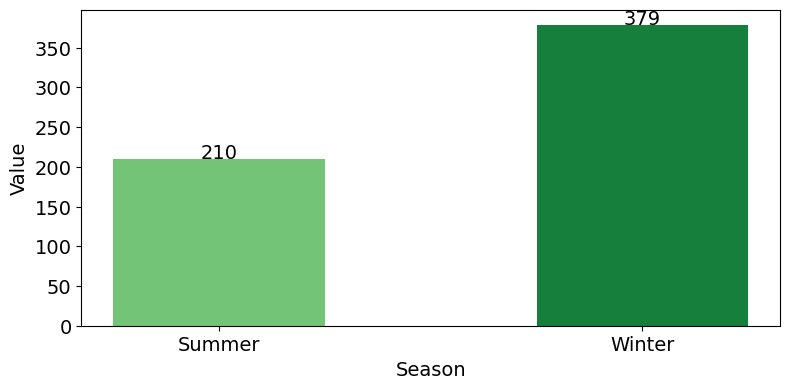

In [32]:
import pandas as pd

# Ensure the DataFrame exists
if "people_date" in locals() or "people_date" in globals():
    # Define summer and winter months
    summer_months = [4, 5, 6, 7, 8, 9]
    winter_months = [10, 11, 12, 1, 2, 3]

     # Filter data for 2017 and later
    filtered_data = filtered_data[filtered_data["year"] >= 2017]

    # Filter data for summer and winter
    summer_data = filtered_data[filtered_data["month"].isin(summer_months)]
    winter_data = filtered_data[filtered_data["month"].isin(winter_months)]

    # Calculate the number of unique participants for summer and winter by year
    unique_summer = summer_data.groupby("year")["name"].nunique()
    unique_winter = winter_data.groupby("year")["name"].nunique()

    # Calculate the average number of unique participants for summer and winter
    average_unique_summer = unique_summer.mean()
    average_unique_winter = unique_winter.mean()

    # Display the results
    print(f"Average number of unique participants in summer: {average_unique_summer}")
    print(f"Average number of unique participants in winter: {average_unique_winter}")
else:
    print("DataFrame 'people_date' does not exist.")


    
# Data for the bar graph
seasons = ["Summer", "Winter"]
values = [average_unique_summer, average_unique_winter]  # Replace with your actual values

# X-axis positions for the bars
x = np.arange(len(seasons))

# Bar width
bar_width = 0.5

# Use the "Greens" colormap
cmap = cm.get_cmap("Greens")
colors = cmap(np.linspace(0.5, 0.8, len(values)))

# Plot the bar graph
plt.figure(figsize=(8, 4))
plt.bar(x, values, width=bar_width, color=colors, label="Participants")

# Add labels and title
plt.xlabel("Season", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(x, seasons, fontsize=14)
plt.yticks(fontsize=14)

# Add value labels on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.5, f"{value:.0f}", ha="center", fontsize=14)

# Show the plot
plt.tight_layout()

The average is being calculated as follows:

1. **Filter Data by Year (2017 and Later)**:
   - The `filtered_data` DataFrame is created by selecting rows where the `year` is greater than or equal to 2017.

2. **Filter Data by Seasons**:
   - `summer_data`: Rows where the `month` is in the `summer_months` list `[4, 5, 6, 7, 8, 9]`.
   - `winter_data`: Rows where the `month` is in the `winter_months` list `[10, 11, 12, 1, 2, 3]`.

3. **Group by Year and Count Unique Participants**:
   - `unique_summer`: Groups `summer_data` by `year` and counts the number of unique `name` values for each year.
   - `unique_winter`: Groups `winter_data` by `year` and counts the number of unique `name` values for each year.

4. **Calculate the Average**:
   - `unique_summer.mean()`: Computes the mean (average) of the yearly unique participant counts for summer.
   - `unique_winter.mean()`: Computes the mean (average) of the yearly unique participant counts for winter.

### Example:
If the `unique_summer` series contains the following counts for each year:
```
2017: 50
2018: 60
2019: 55
2020: 65
```
The average is calculated as:
```
average_unique_summer = (50 + 60 + 55 + 65) / 4 = 57.5
```

Similarly, the same logic applies to `unique_winter`.

Average number of participants in summer: 389.1111111111111
Average number of participants in winter: 586.1111111111111
Average number of unique participants in summer: 210.11111111111111
Average number of unique participants in winter: 378.77777777777777


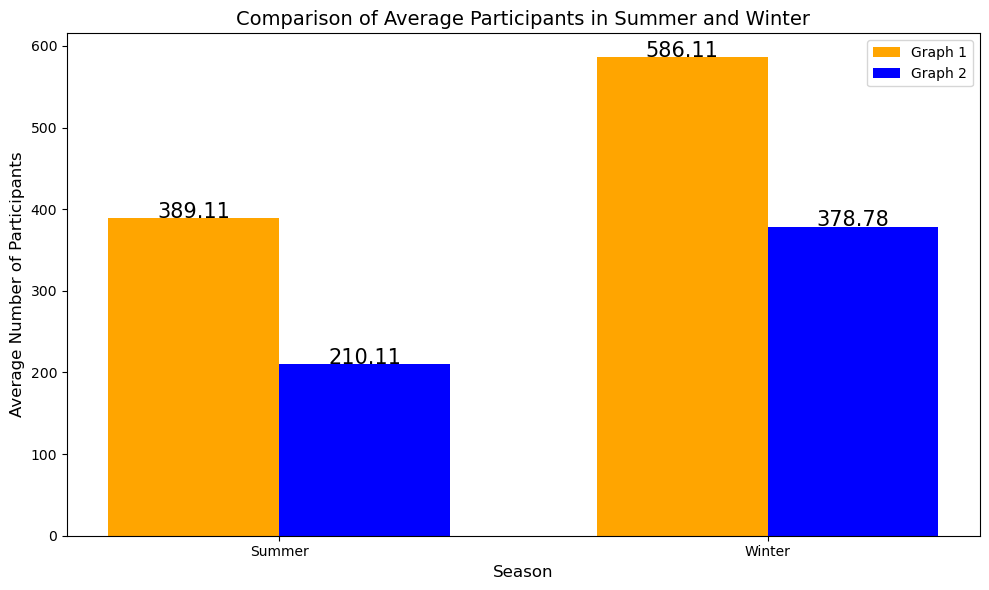

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample DataFrame
data = {
    "name": people_date['name'],
    "month": people_date['month'],
    "year": people_date['year'],
    "tuple_frequency": people_date['tuple_frequency']
}
df = pd.DataFrame(data)
df = df[df["year"] >= 2017]

# Define summer and winter months
summer_months = [4, 5, 6, 7, 8, 9]
winter_months = [10, 11, 12, 1, 2, 3]

# Filter data for summer and winter
summer_data = df[df["month"].isin(summer_months)]
winter_data = df[df["month"].isin(winter_months)]

# Calculate average number of participants for summer and winter
average_summer_graph1 = summer_data["tuple_frequency"].sum() / len(summer_data["year"].unique())
average_winter_graph1 = winter_data["tuple_frequency"].sum() / len(winter_data["year"].unique())

# Display the results
print(f"Average number of participants in summer: {average_summer_graph1}")
print(f"Average number of participants in winter: {average_winter_graph1}")

# ----------------------------------------------

# Sample DataFrame
data = {
    "name": people_date['name'],
    "month": people_date['month'],
    "year": people_date['year'],
    "tuple_frequency": people_date['tuple_frequency']
}
df = pd.DataFrame(data)
df = df[df["year"] >= 2017]

# Define summer and winter months
summer_months = [4, 5, 6, 7, 8, 9]
winter_months = [10, 11, 12, 1, 2, 3]

# Filter data for summer and winter
summer_data = df[df["month"].isin(summer_months)]
winter_data = df[df["month"].isin(winter_months)]

# Calculate the number of unique participants for summer and winter
unique_summer = summer_data.groupby("year")["name"].nunique()
unique_winter = winter_data.groupby("year")["name"].nunique()

# Calculate the average number of unique participants for summer and winter
average_summer_graph2 = unique_summer.mean()
average_winter_graph2 = unique_winter.mean()

# Display the results
print(f"Average number of unique participants in summer: {average_summer_graph2}")
print(f"Average number of unique participants in winter: {average_winter_graph2}")

#-------------------------------------------

# Data for the bar graph
seasons = ["Summer", "Winter"]
averages_graph1 = [average_summer_graph1, average_winter_graph1]  # Replace with values from Graph 1
averages_graph2 = [average_summer_graph2, average_winter_graph2]  # Replace with values from Graph 2

# X-axis positions for the bars
x = np.arange(len(seasons))

# Bar width
bar_width = 0.35

# Plot the double bar graph
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, averages_graph1, width=bar_width, color="orange", label="Graph 1")
plt.bar(x + bar_width / 2, averages_graph2, width=bar_width, color="blue", label="Graph 2")

# Add labels and title
plt.title("Comparison of Average Participants in Summer and Winter", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Number of Participants", fontsize=12)
plt.xticks(x, seasons)
plt.legend()

# Add value labels on top of the bars
for i, value in enumerate(averages_graph1):
    plt.text(i - bar_width / 2, value + 0.5, f"{value:.2f}", ha="center", fontsize=15)
for i, value in enumerate(averages_graph2):
    plt.text(i + bar_width / 2, value + 0.5, f"{value:.2f}", ha="center", fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()

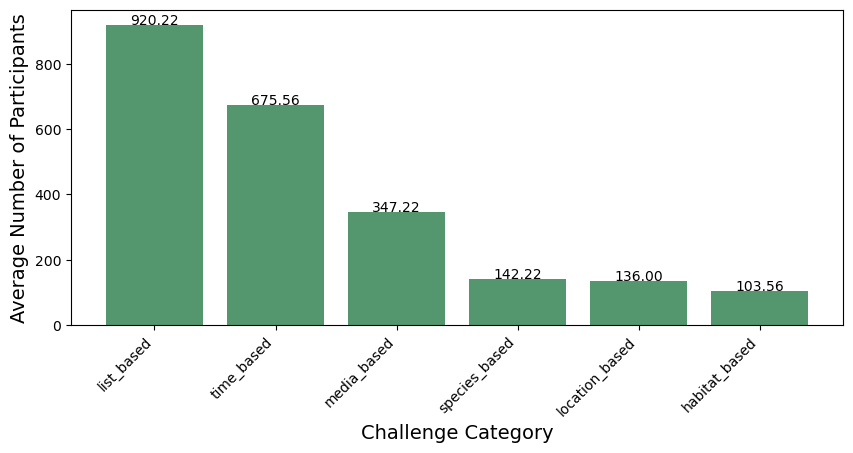

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
data = {
    "name": people_date['name'],
    "month": people_date['month'],
    "year": people_date['year'],
    "tuple_frequency": people_date['tuple_frequency'],
    "list_based": people_date['list_based'],
    "location_based": people_date['location_based'],
    "species_based": people_date['species_based'],
    "habitat_based": people_date['habitat_based'],
    "media_based": people_date['media_based'],
    "time_based":  people_date['time_based']
}
df = pd.DataFrame(data)

# Calculate the average number of participants for each category
categories = ["list_based", "location_based", "species_based", "habitat_based", "media_based", "time_based"]
averages = {category: df[category].sum() / len(df["year"].unique()) for category in categories}

# Sort the averages by value
sorted_averages = dict(sorted(averages.items(), key=lambda item: item[1], reverse=True))

# Plot the bar graph
plt.figure(figsize=(10, 6))  # Increased figure size
plt.bar(sorted_averages.keys(), sorted_averages.values(), color="#54976E")

# Add labels and title
plt.xlabel("Challenge Category", fontsize=14)
plt.ylabel("Average Number of Participants", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout(pad=6)  # Adjusted padding for better visibility

# Add values on top of the bars
for i, value in enumerate(sorted_averages.values()):
    plt.text(i, value + 0.5, f"{value:.2f}", ha="center", fontsize=10)

# Show the plot

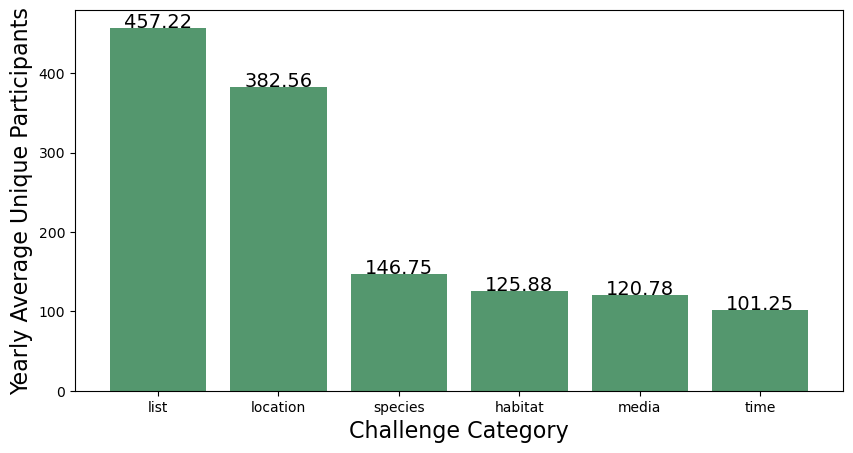

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
data = {
    "name": people_date['name'],
    "month": people_date['month'],
    "year": people_date['year'],
    "tuple_frequency": people_date['tuple_frequency'],
    "list_based": people_date['list_based'],
    "location_based": people_date['location_based'],
    "species_based": people_date['species_based'],
    "habitat_based": people_date['habitat_based'],
    "media_based": people_date['media_based'],
    "time_based": people_date['time_based']
}
df = pd.DataFrame(data)

# List of challenge categories
categories = ["list_based", "location_based", "species_based", "habitat_based", "media_based", "time_based"]

# Dictionary to store yearly average unique participants for each category
avg_unique_participants = {}

for category in categories:
    # Filter rows where the category is participated (value = 1)
    participants = df[df[category] == 1]
    
    # Group by year and count unique names
    yearly_unique_counts = participants.groupby("year")["name"].nunique()
    
    # Calculate the average yearly unique participants
    avg_unique_participants[category] = yearly_unique_counts.mean()

# Sort the averages by value
sorted_avg_unique_participants = dict(sorted(avg_unique_participants.items(), key=lambda item: item[1], reverse=True))

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_avg_unique_participants.keys(), sorted_avg_unique_participants.values(), color="#54976E")

# Add labels and title
plt.xlabel("Challenge Category", fontsize=16)
plt.ylabel("Yearly Average Unique Participants", fontsize=16)

# Rename x-axis labels
custom_labels = ["list", "location", "species", "habitat", "media", "time"]
plt.xticks(range(len(custom_labels)), custom_labels)

plt.tight_layout(pad=6)

# Add values on top of the bars
for i, value in enumerate(sorted_avg_unique_participants.values()):
    plt.text(i, value + 0.5, f"{value:.2f}", ha="center", fontsize=14)

# Show
plt.show()

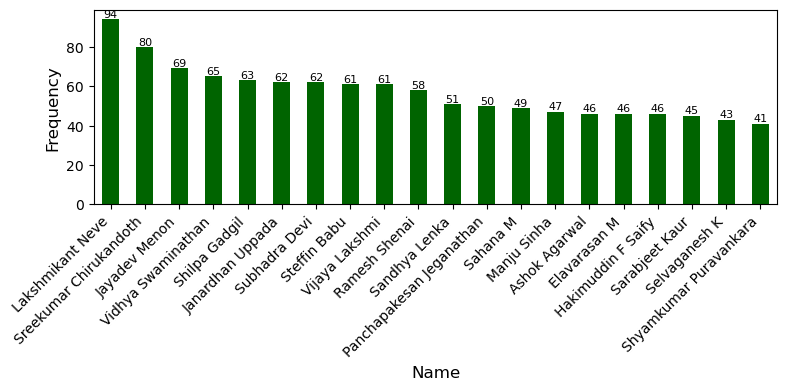

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the DataFrame exists
if "people_date" in locals() or "people_date" in globals():
    # Count the frequency of each name
    name_counts = people_date["name"].value_counts()

    # Get the top 20 names
    top_20_names = name_counts.head(20)

    # Plot the graph
    plt.figure(figsize=(8, 4))
    bars = top_20_names.plot(kind="bar", color="darkgreen")
    # plt.title("Top 20 Birders by Frequency of Appearance", fontsize=14)
    plt.xlabel("Name", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

    # Add frequency numbers on top of each bar
    for bar in bars.patches:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            str(int(bar.get_height())),
            ha="center",
            va="bottom",
            fontsize=8
        )

    plt.show()
else:
    print("DataFrame 'people_date' does not exist.")

In [37]:
import pandas as pd

# Ensure the DataFrame exists
if "people_date" in locals() or "people_date" in globals():
    # Create tables for each type along with month and year
    types = ["list_based", "location_based", "species_based", "habitat_based", "media_based", "time_based"]
    tables = {}
    frequency_tables = {}

    for challenge_type in types:
        # Filter for participants in the current challenge type (value = 1)
        participants = people_date[people_date[challenge_type] == 1]
        counts = participants.groupby(["name", "month", "year"]).size().reset_index()
        tables[challenge_type] = counts  # Original table with name, month, year

        # Create frequency table for the current challenge type
        frequency_counts = participants["name"].value_counts().reset_index()
        frequency_counts.columns = ["name", "frequency"]
        frequency_tables[challenge_type] = frequency_counts.head(20)  # Top 20 names

    # Find common names across all top 20 frequency tables
    top_20_names_sets = [set(freq_table["name"]) for freq_table in frequency_tables.values()]
    common_names = set.intersection(*top_20_names_sets)

    # Display the common names
    print("Common names in the top 20 of each challenge type:")
    print(common_names)
else:
    print("DataFrame 'people_date' does not exist.")

Common names in the top 20 of each challenge type:
{'Jayadev Menon', 'Janardhan Uppada', 'Shilpa Gadgil', 'Vidhya Swaminathan', 'Lakshmikant Neve', 'Vijaya Lakshmi', 'Steffin Babu', 'Sreekumar Chirukandoth', 'Ramesh Shenai'}


In [ ]:
import pandas as pd
import json
import requests
from readability import Document
from bs4 import BeautifulSoup
from requests.exceptions import RequestException

def get_api_key():
  return "YOUR_API_KEY"

def get_prompt_text():
  return (f"""
Extract structured information from the text below about a birding challenge. For each item, provide the value or list if available, or 'Not found' if missing.

1. Number of birders
2. Number of observations
3. Number of lists
4. Number of species
5. Number of unique lists with media
6. Names of birders (as a list)
7. Winner's name
8. How was the winner chosen
9. Location of the challenge (if any)
10. Upload requirements or conditions for completing the challenge
11. Any tips or important points (list)
12. List of bird species mentioned (if any)

Text:
\"\"\"{page_content}\"\"\"
""")
def extract_main_content(url):
    headers = {
        'User-Agent': 'Mozilla/5.0'
    }

    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
    except RequestException as e:
        return f"❌ Failed to fetch page: {e}"

    # Use Readability to extract the main article content
    doc = Document(response.text)
    html_content = doc.summary()
    title = doc.title()

    # Optionally clean with BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')
    text = soup.get_text(separator='\n', strip=True)

    return f"📄 Title: {title}\n\n{text}"

def send_to_gemini(api_key: str, page_content: str):
    url = f"https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key={api_key}"

    headers = {
        "Content-Type": "application/json"
    }

    # Build the prompt with instructions + your scraped content
    prompt_text = get_prompt_text()

    data = {
        "contents": [
            {
                "parts": [
                    {
                        "text": prompt_text.strip()
                    }
                ]
            }
        ]
    }

    response = requests.post(url, headers=headers, json=data)

    if response.status_code == 200:
        result = response.json()
        return result
    else:
        raise Exception(f"Error {response.status_code}: {response.text}")

def pretty_print_gemini_response(response_json):
    try:
        # Extract the first candidate's first part's text
        candidates = response_json.get("candidates", [])
        if not candidates:
            print("No candidates found in response.")
            return

        content = candidates[0].get("content", {})
        parts = content.get("parts", [])
        if not parts:
            print("No parts found in content.")
            return

        text = parts[0].get("text", "")

        # Print clean output
        print("\n=== Extracted Structured Information ===\n")
        print(text.strip())

    except Exception as e:
        print(f"Error while parsing response: {e}")

if __name__ == "__main__":
    df = pd.read_excel("/content/ebird_challenges_20250608.xlsx")
    urls = df["Article URL"].dropna().tolist()
    urls = urls[:1]  # You can change 5 to any other stopper
    API_KEY = get_api_key()

    for idx, url in enumerate(urls, start=1):
        print(f"\n🔗 Processing URL {idx}: {url}")
        try:
            page_content = extract_main_content(url)
            response = send_to_gemini(API_KEY, page_content)

            print("📥 Gemini Response:")
            pretty_print_gemini_response(response)
        except Exception as e:
            print(f"❌ Failed to process URL {idx}: {e}")